<a href="https://colab.research.google.com/github/sonjoy1s/project_weak_ML/blob/main/Laptop_Price_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.linear_model import Lasso , Ridge


from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,classification_report

import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/content/data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [4]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [5]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [6]:
df['price_log'] = np.log1p(df['price'])

In [7]:
df.drop(columns=['price'],inplace=True)

In [8]:
df.head()

,brand,name,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,price_log
0,HP,Victus 15-fb0157AX Gaming Laptop,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,10.817796
1,HP,15s-fq5007TU Laptop,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,10.594157
2,Acer,One 14 Z8-415 Laptop,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,10.203259
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,10.997590
4,Apple,MacBook Air 2020 MGND3HN Laptop,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,11.156122


In [9]:
X = df.drop('price_log',axis=1)
y = df['price_log']

In [10]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns
print(numerical_features)
categorical_features = X.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['spec_rating', 'display_size', 'resolution_width', 'resolution_height',
       'warranty'],
      dtype='object')
Index(['brand', 'name', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM',
       'ROM_type', 'GPU', 'OS'],
      dtype='object')


In [11]:
num_transformer = Pipeline (
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ]
)

In [12]:
cat_transformer = Pipeline( steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
] )

In [13]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numerical_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )

In [14]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25 , random_state=42)

In [15]:
#base learner

reg_lr = LinearRegression()
reg_ridge = Ridge( alpha=10 )
reg_lasso = Lasso( alpha=0.01 )
reg_rf = RandomForestRegressor( n_estimators=200, random_state=42 )
reg_gb = GradientBoostingRegressor( n_estimators=200 , random_state=42 )
reg_xgb = XGBRegressor( n_estimators=100 ,learning_rate=0.5 ,random_state=42 )
reg_lgb = LGBMRegressor( n_estimators=100 , random_state=42 )
reg_ada = AdaBoostRegressor( n_estimators=100 , random_state=42 )

In [16]:
#voting regressor

voting_reg = VotingRegressor(
    estimators=[
        ('lr',reg_lr),
        ('rf',reg_rf),
        ('gb',reg_gb),
        ('xgb',reg_xgb),
        ('lgb',reg_lgb),
        #('ada',reg_ada)
        ('ridge',reg_ridge),
        ('lasso',reg_lasso)
    ]
)

In [17]:
#stacking
stacking_reg = StackingRegressor(
    estimators=[
        ('lr',reg_lr),
        ('rf',reg_rf),
        ('gb',reg_gb),
        ('xgb',reg_xgb),
        ('lgb',reg_lgb),
        #('ada',reg_ada)
        ('ridge',reg_ridge),
        ('lasso',reg_lasso)
])

In [18]:
# model Train
import warnings
warnings.filterwarnings('ignore')

model_train = {
    'Linear Regression':reg_lr,
    'Random Forest':reg_rf,
    'Gradient Boosting':reg_gb,
    'XGBoost':reg_xgb,
    'LightGBM':reg_lgb,
    'AdaBoost':reg_ada,
    'Voting Regressor':voting_reg,
    'Stacking Regressor':stacking_reg

}


In [19]:
results = []
for name, model in model_train.items():
  pipe = Pipeline(
      [
          ('preprocessor',preprocessor),
          ('model',model)
      ]
  )

  pipe.fit(X_train,y_train)

  y_pred = pipe.predict(X_test)

  r2 = r2_score(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  rmse = np.sqrt(mse)

  results.append({
      'Model Name':name,
      'R2 Score':r2,
      'MSE':mse,
      'MAE':mae,
      'RMSE':rmse
  })

result_df = pd.DataFrame(results).sort_values("R2 Score",ascending=False)

print(result_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 669, number of used features: 49
[LightGBM] [Info] Start training from score 11.106589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 669, number of used features: 49
[LightGBM] [Info] Start training from score 11.106589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

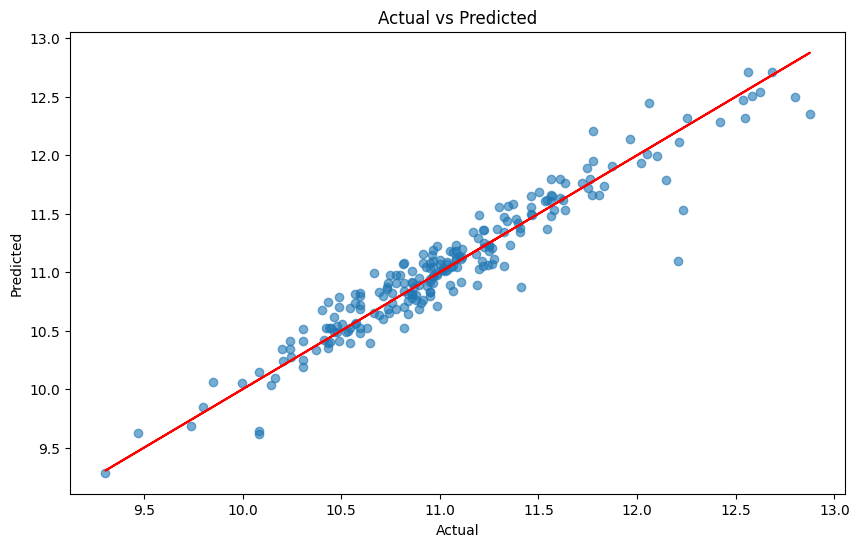

In [20]:
import warnings
warnings.filterwarnings('ignore')

best_model = result_df.iloc[0]['Model Name']
best_model_obj = model_train[best_model]

final_pipe = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',best_model_obj)
    ]
)

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)
print(r2_score(y_test,y_pred))


#plot part
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=y_final_pred,alpha=0.6)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Cross valitization

In [22]:
from sklearn.model_selection import cross_val_score


In [31]:
#Pipeline for cross:

rf_pipe = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor(n_estimators=1000,random_state=42))
    ]
)

In [32]:
param_grid = {
    'model__n_estimators':[100,200],
    'model__max_depth':[None,5,10],
    'model__min_samples_split':[2,5]
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator= rf_pipe,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    verbose = 1
)

In [34]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['spec_rating', 'display_size', 'resolution_width', 'resolution_height',
       'warranty'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['brand', 'name', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM',
       'ROM_type', 'GPU', 'OS'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(n_estimators=1000,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
print(-grid_search.best_score_)

0.06288309269513748


In [36]:
print(grid_search.scoring)


neg_mean_squared_error


In [37]:
print(grid_search.best_params_)

{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [38]:
stacking_pipe = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',stacking_reg)
    ]
)

In [39]:
cv_score = cross_val_score(
    stacking_pipe,
    X_train,
    y_train,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1
)

In [40]:
stacking_rmse = np.sqrt(-cv_score)
print(stacking_rmse)

[0.21152634 0.22584257 0.19124575 0.22699896 0.26867976]


In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Train
stacking_pipe.fit(X_train, y_train)

# Prediction
y_pred = stacking_pipe.predict(X_test)

# RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 669, number of used features: 49
[LightGBM] [Info] Start training from score 11.106589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -